# PatchMatch

**Imports**

In [103]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "patchmatch":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from tqdm import tqdm
import cv2 as cv

import patchmatch as pm

In [115]:
mask = compute_mask(A['vect_field'],A['n'], A['m'], A['p'])
im = Image.open("data/TP_C01_001_gt.png")
im = np.array(im).astype("double")

The number of detection is :  1


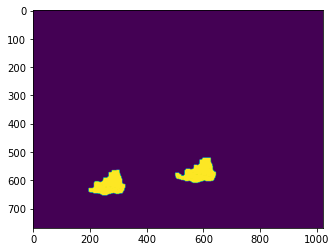

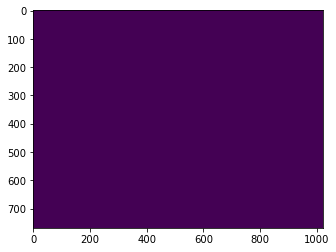

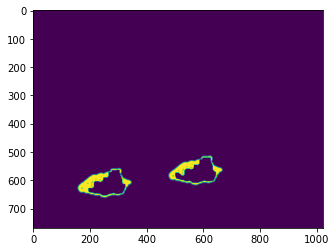

0.7442139326621509


In [120]:
TP = mask*im
FP = 1*(mask>0)*(im<1)
FN = (np.ones((A['m'], A['n']))-mask)*im

plt.imshow(TP)
plt.show()
plt.imshow(FP)
plt.show()
plt.imshow(FN)
plt.show()

F = 2 * np.sum(TP) /(2*np.sum(TP) + np.sum(FN) + np.sum(FP))
print(F)

In [155]:
a = 'TP_C01_'
F = []
Names = []
for filename in tqdm(os.listdir("notebooks/results")):
    if filename[:7] == a:
        Names.append(filename)
        A = np.load('notebooks/results/'+filename)
        mask = compute_mask(A['vect_field'],A['n'], A['m'], A['p'])
        title = filename[:10]
        im = Image.open('data/'+title+'_gt.png')
        im = np.array(im).astype("double")

        TP = mask*im
        FP = 1*(mask>0)*(im<1)
        FN = (np.ones((A['m'], A['n']))-mask)*im
        F.append( 2 * np.sum(TP) /(2*np.sum(TP) + np.sum(FN) + np.sum(FP)))
print(F)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.46it/s]

[0.7442139326621509, 0.9526751228426013, 0.7192091606922796, 0.5977436075812971, 0.9477321853373971, 0.9212921647393725, 0.9072118851857904, 0.9310739941897244, 0.9395018236732546, 0.9293696010996709, 0.8358374523563281, 0.7300078825012485, 0.5439147437225895, 0.8974105531564515, 0.9009037300446099, 0.9468370834679942, 0.916251196351564, 0.9253738163266951, 0.8964807269518446, 0.9127028570136075, 0.8922928698412599, 0.8870091361510825, 0.8700548810972565, 0.7836571232645275, 0.8813292805704919, 0.9074296930479034, 0.8929137092462027, 0.8667827913523558, 0.8552875968269628, 0.9280097755543856, 0.9335675810971482, 0.895292453681685, 0.9146411556681608, 0.9309211457562462, 0.8406741808959318, 0.9142152209450918, 0.9401836216745518, 0.8969859169519608, 0.8994796384889052, 0.8735470487370444]


In [156]:
F = np.array(F)
print('mean accuracy = ',np.mean(F))
print('std accuracy = ',np.std(F))

mean accuracy =  0.8725004585186408
std accuracy =  0.08908870049514192


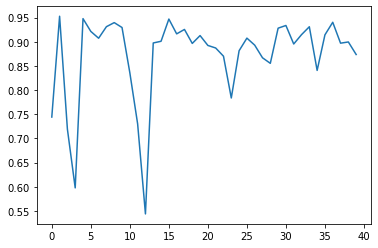

In [157]:
plt.plot(F)

In [174]:
filename = Names[10]
Names.append(filename)
A = np.load('notebooks/results/'+filename)
mask = compute_mask(A['vect_field'],A['n'], A['m'], A['p'])
title = filename[:10]
im = Image.open('data/'+title+'_gt.png')
im = np.array(im).astype("double")

TP = mask*im
FP = 1*(mask>0)*(im<1)
FN = (np.ones((A['m'], A['n']))-mask)*im

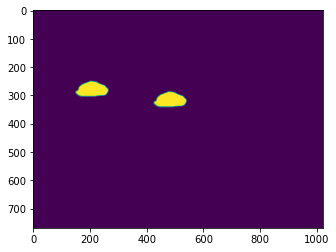

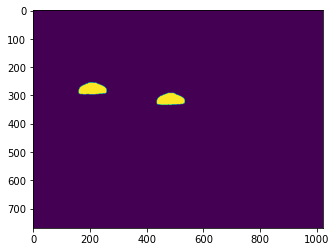

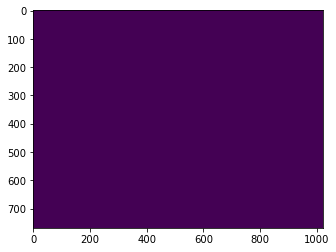

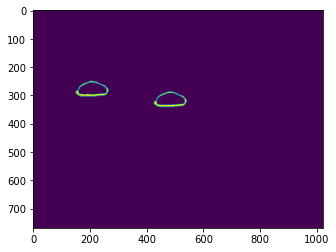

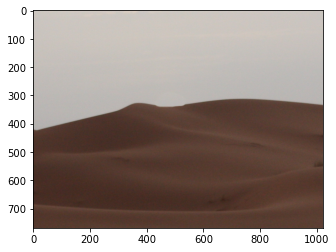

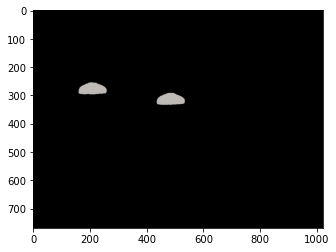

In [183]:
plt.imshow(im)
plt.show()
plt.imshow(TP)
plt.show()
plt.imshow(FP)
plt.show()
plt.imshow(FN)
plt.show()
im2 = Image.open('data/'+title+'_copy.png')
im2 = np.array(im2).astype("double")
plt.imshow((im2).astype("uint8"))
plt.show()
plt.imshow((im2*mask[:,:,None]).astype("uint8"))
plt.show()

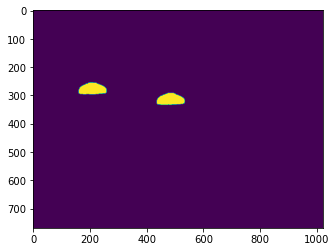

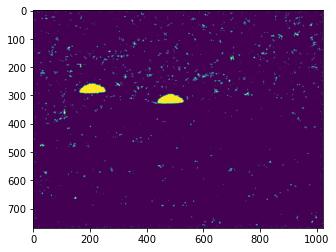

In [229]:
indice = np.where(mask>=0)
I = indice[0]
J = indice[1]
m = A['m']
n = A['n']
indice_arrive = (np.array(indice) + vect_field[indice].T)
mask_arrive = mask[(indice_arrive[0],indice_arrive[1])]
plt.imshow(mask)
plt.show()
plt.imshow(mask_arrive.reshape((m,n)))
plt.show()

n =  1024
m =  768


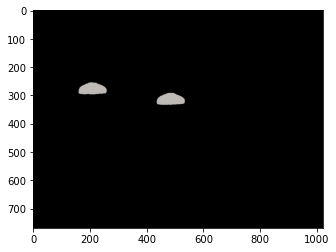

8310480.0


In [221]:
indice = np.where(mask==1)
I = indice[0]
J = indice[1]
vect_field = A['vect_field']
print('n = ',A['n'])
print('m = ',A['m'])

indice_arrive = (np.array(indice) + vect_field[indice].T)

dist = np.sum((im2[indice]-im2[(indice_arrive[0],indice_arrive[1])])**2)
plt.imshow((im2*mask[:,:,None]).astype("uint8"))
plt.show()
print(dist)

**Matplotlib display mode**

In [2]:
# Run this cell to display matplotlib plots in a separate window
%matplotlib qt

In [3]:
# Run this cell to display matplotlib plots inside the jupyter notebook
%matplotlib inline

In the following sections, we test the PatchMatch algorithm on 2 different images with copy-move forgery: one with a simple translation and one with a translation and a rotation.

## Image 1: Antibes

### Load image 

In [4]:
im = Image.open("data/TP_C02_007_copy.png")
im = np.array(im).astype("double")
gt = Image.open("data/TP_C02_007_gt.png")
gt = np.array(gt) > 0

### Initialize Patchmatch

Expected runtime with init_method=1 and zernike=True (p=10, max_zrd=6): 54s   
Expected runtime with init_method=2 and zernike=True (p=10, max_zrd=6): 55s   
Expected runtime with init_method=1 and zernike=False (p=10, max_zrd=6): 5s   
Expected runtime with init_method=2 and zernike=False (p=10, max_zrd=6): 5s   

In [51]:
t0 = time()
a = pm.PatchMatch(
    im,  # image
    p=10,  # patch half-size
    max_zrd=6,  # maximum Zernike degree
    min_dn=64,   # minimum displacement norm (previously T)
    n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
    init_method=2,  # whether to use create_vect_field1 or create_vect_field2
    zernike=True  # whether to use Zernike moments
)
t1 = time()
print(t1 - t0)

155.44515013694763


### Run PatchMatch

Expected running time with zernike=True (max_zrd=6): <10s for each iteration (1 iteration = 2 scans)

In [52]:
t0 = time()
a.run(5)
t1 = time()
print(t1 - t0)

Scan
1931490
Scan
1158079
Scan
760604
Scan
538421
Scan
398546
Scan
303646
Scan
241857
Scan
197809
Scan
166407
Scan
143694
82.19189310073853


In [53]:
a.get_min_displacement_norm()

64

### Plot results

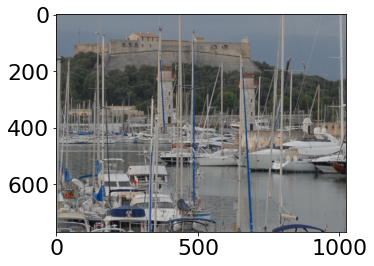

In [54]:
plt.imshow(im.astype("uint8"))

In [55]:
def plot_vect_field(pm_, mask, step=100, **kwargs):
    """
    Plot vect_field as arrows above the image
    
    Parameters
    ----------
    pm_ : instance of PatchMatch
    mask : array-like, shape (m, n)
        only vectors whose "roots" are on pixels for wich mask is non-zero will be plotted
    step : int
        step between two plotted vectors
    **kwargs : keyword arguments
        keyword arguments to be passed to plt.arrow (e.g. head_width, head_length, ...)
    """
    default_kwargs = {"width": 1e-3, "head_width": 1, "head_length": 1.5, "length_includes_head": True}
    default_kwargs.update(kwargs)
    default_kwargs["head_length"] = 1.5 * default_kwargs["head_width"]
    plt.imshow(pm_.im.astype("uint8"))
    for i in range(0, pm_.m, step):  # for each pixel in the mask
        for j in range(0, pm_.n, step):
            if mask[i, j] > 0:
                plt.arrow(j, i, *pm_.vect_field[i, j, ::-1], **default_kwargs)
    plt.axis("off")

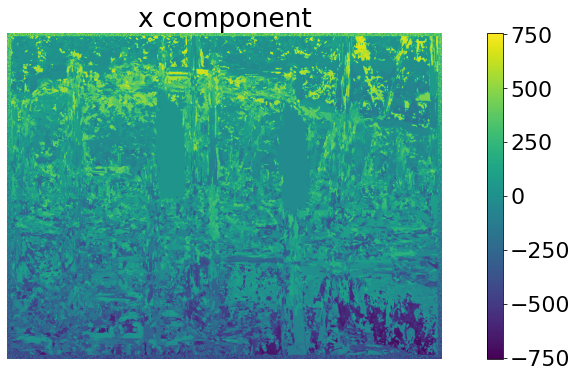

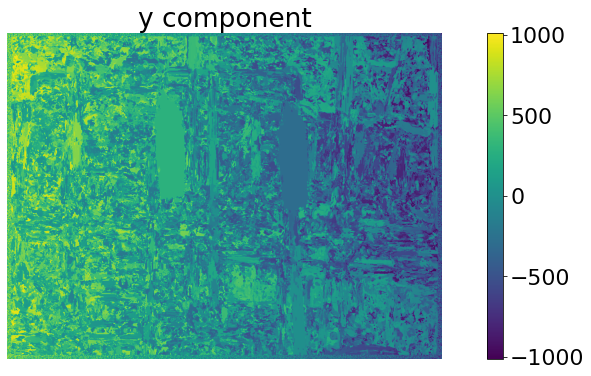

In [56]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(16,6))
plt.title('x component')
plt.imshow(a.vect_field[..., 0]) #, vmin=0, vmax=60)
plt.colorbar()
plt.axis("off")
plt.show()
plt.figure(figsize=(16,6))
plt.title('y component')
plt.imshow(a.vect_field[..., 1]) #, vmin=0, vmax=60)
plt.colorbar()
plt.axis("off")
plt.show()
# plt.figure(figsize=(16,6))
# plt.title('Norm of displacement vectors')
# plt.imshow(np.sqrt(a.vect_field[..., 0]**2 + a.vect_field[..., 1]**2)) #, vmin=0, vmax=60)
# plt.colorbar()
# plt.show()

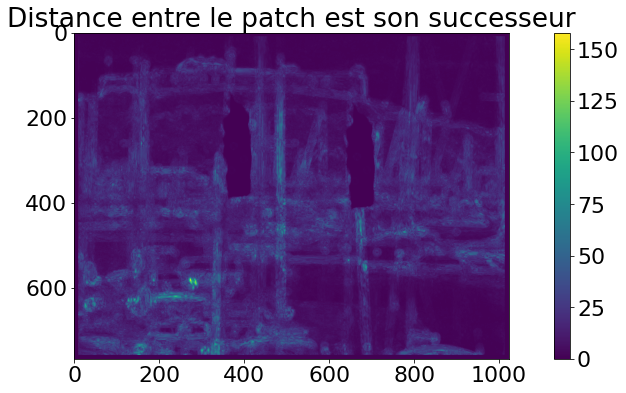

In [57]:
plt.figure(figsize=(16,6))
plt.title('Distance entre le patch est son successeur')
plt.imshow(a.dist_field)
plt.colorbar()
plt.show()

In [61]:
p = 10

def gradn(u):
    v = np.sqrt( (np.diff(u,axis=0)[:,:-1])**2 + (np.diff(u,axis=1)[:-1,:])**2 )
    return v

vx = gradn(a.vect_field[..., 0])
vy = gradn(a.vect_field[..., 1])
n, m = a.n, a.m

mask_0 = np.zeros((m,n))
mask_0[:-1,:-1] = 1*(vy<0.1)*(vx<0.1)

#Mean to eliminate noise
mask_1 = np.zeros((m,n))
r = 3
for i in tqdm(range(r, m - r)):
    for j in range(r, n - r):
        mask_1[i,j] = np.mean(mask_0[i-r+1:i+r,j-r+1:j+r])

#good threshold to keep just the mask
th = 0.5
mask_2 = 1*(mask_1>th)

#look at connexe component and keep just biggest ones
mask_3 = np.uint8((mask_2))
N, component = cv.connectedComponents(mask_3)
white_pixel = np.sum(mask_2)
Liste_component = []
for i in range(1,N):
    #we keep just component which as more than 5% of white pixels
    if np.sum(1*(component==i))/white_pixel > 0.05:
        Liste_component.append(i)
mask_4 = np.zeros((m,n))
number_detection = len(Liste_component)//2
print("The number of detection is : ", number_detection)
for i in Liste_component:
    mask_4 += 1*(component==i)

#dilatation
mask = np.zeros((m,n))
for i in tqdm(range(m)):
    for j in range(n):
        mask[i,j] = np.max(mask_4[max(i-p+1,0):min(i+p,m-1),max(j-p+1,0):min(j+p,n-1)])

100%|████████████████████████████████████████████████████████████████████████████████| 762/762 [00:15<00:00, 48.83it/s]


The number of detection is :  1


100%|████████████████████████████████████████████████████████████████████████████████| 768/768 [00:11<00:00, 65.89it/s]


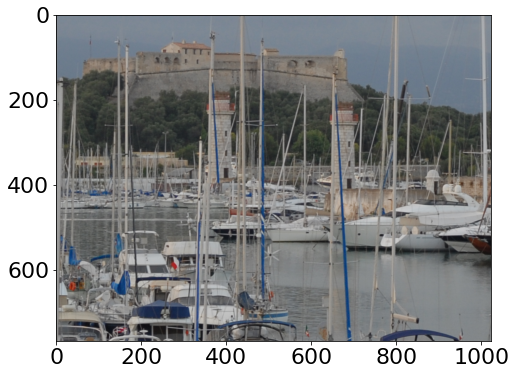

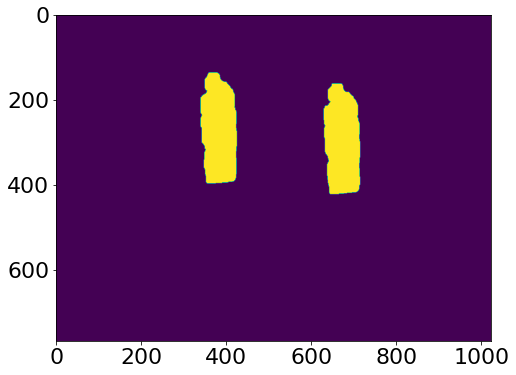

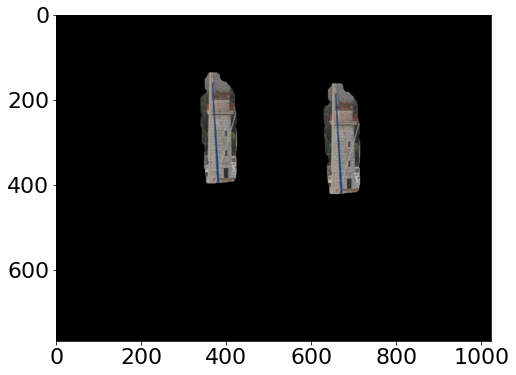

In [62]:
plt.figure(figsize=(16,6))
plt.imshow(im.astype("uint8"))
plt.show()

plt.figure(figsize=(16,6))
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,6))
plt.imshow((mask[:,:,None]*im).astype("uint8"))
plt.show()

# Image 2 : Leaf

In [14]:
# im = Image.open("data/feuille_copy_move.png")
# im = np.array(im).astype("double")

In [15]:
# t0 = time()
# a = pm.PatchMatch(
#     im,  # image
#     p=10,  # patch half-size
#     max_zrd=6,  # maximum Zernike degree
#     min_dn=64,   # minimum displacement norm (previously T)
#     n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
#     init_method=2,  # whether to use create_vect_field1 or create_vect_field2
#     zernike=True  # whether to use Zernike moments
# )
# t1 = time()
# print(t1 - t0)

In [16]:
# t0 = time()
# a.run(5)
# t1 = time()
# print(t1 - t0)

In [17]:
# plt.figure(figsize=(16,6))
# plt.imshow(im.astype("uint8"))
# plt.show()

# plt.figure(figsize=(16,6))
# pm.plot_vect_field(a, gt, step=30, head_width=10)
# plt.show()

# plt.figure(figsize=(16,6))
# plt.title('Composante x des vecteurs de déplacement')
# plt.imshow(a.vect_field[..., 0]) #, vmin=0, vmax=60)
# plt.colorbar()
# plt.show()
# plt.figure(figsize=(16,6))
# plt.title('Composante y des vecteurs de déplacement')
# plt.imshow(a.vect_field[..., 1]) #, vmin=0, vmax=60)
# plt.colorbar()
# plt.show()
# plt.figure(figsize=(16,6))
# plt.title('Norme des vecteurs de déplacement')
# plt.imshow(np.sqrt(a.vect_field[..., 0]**2 + a.vect_field[..., 1]**2)) #, vmin=0, vmax=60)
# plt.colorbar()
# plt.show()

# plt.figure(figsize=(16,6))
# plt.title('Distance entre le patch est son successeur')
# plt.imshow(a.dist_field)
# plt.colorbar()
# plt.show()

In [18]:
# vx = gradn(a.vect_field[..., 0])
# vy = gradn(a.vect_field[..., 1])
# n, m = a.n, a.m

# mask_0 = np.zeros((m,n))
# mask_0[:-1,:-1] = 1*(vy<0.1)*(vx<0.1)

# #Mean to eliminate noise
# mask_1 = np.zeros((m,n))
# r = 3
# for i in tqdm(range(r, m - r)):
#     for j in range(r, n - r):
#         mask_1[i,j] = np.mean(mask_0[i-r+1:i+r,j-r+1:j+r])

# #good threshold to keep just the mask
# th = 0.2
# mask_2 = 1*(mask_1>th)

# #dilatation
# mask = np.zeros((m,n))
# for i in tqdm(range(m)):
#     for j in range(n):
#         mask[i,j] = np.max(mask_2[max(i-p+1,0):min(i+p,m-1),max(j-p+1,0):min(j+p,n-1)])

In [19]:
# plt.figure(figsize=(16,6))
# plt.imshow(im.astype("uint8"))
# plt.show()

# plt.figure(figsize=(16,6))
# plt.imshow(mask)
# plt.show()

# plt.figure(figsize=(16,6))
# plt.imshow((mask[:,:,None]*im).astype("uint8"))
# plt.show()

## Image 2: Flowers

### Load image 

In [20]:
im2 = Image.open("data/TP_C01_039_copy_r45.png")
im2 = np.array(im2).astype("double")
gt2 = Image.open("data/TP_C01_039_gt_r45.png")
gt2 = np.array(gt2) > 0

### Initialize Patchmatch

In [21]:
t0 = time()
a2 = pm.PatchMatch(
    im2,  # image
    p=10,  # patch half-size
    max_zrd=6,  # maximum Zernike degree
    min_dn=64,   # minimum displacement norm (previously T)
    n_rs_candidates=5,   # number of candidates in the random search phase (previously L)
    init_method=2,  # whether to use create_vect_field1 or create_vect_field2
    zernike=True  # whether to use Zernike moments
)
t1 = time()
print(t1 - t0)

65.53342461585999


### Analyze Zernike moments

Plot Zernike filters

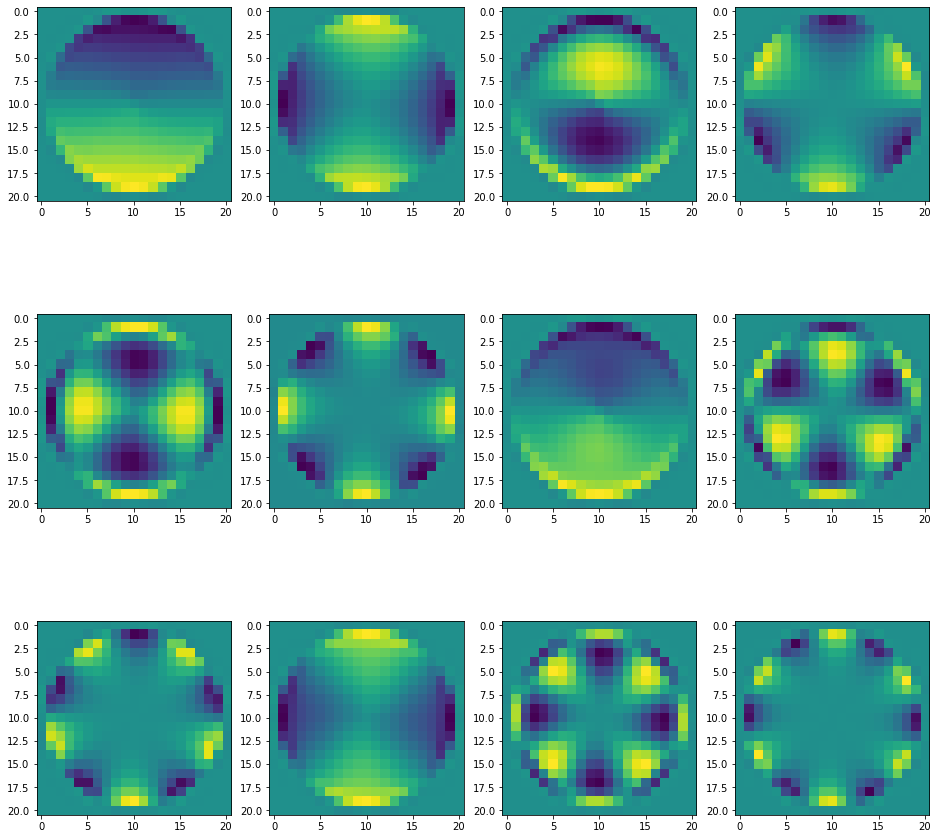

In [22]:
plt.figure(figsize=(16,16))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(a2.zernike_filters[..., i].real)
plt.show()

Get Zernike moments of 3 different patches: 1 et 2 should have the same Zernike moments (rotation invariance), whereas the "control" patch should be quite different.

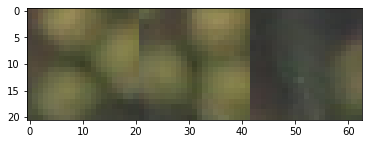

In [23]:
# Show patches 1, 2 and control
plt.imshow(np.concatenate((a2.patch(577, 768), a2.patch(379, 832), a2.patch(128, 988)), axis=1).astype("uint8"))
plt.show()

In [24]:
# Get their Zernike moments
zm1 = a2.zernike_moments[577, 768]
zm2 = a2.zernike_moments[379, 832]
zm_control = a2.zernike_moments[128, 988]

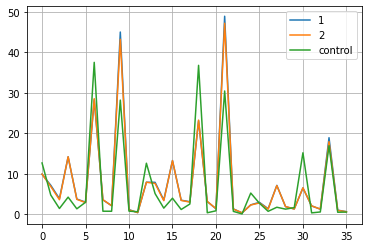

In [25]:
# Plot the Zernike moments
plt.plot(zm1, label="1")
plt.plot(zm2, label="2")
plt.plot(zm_control, label="control")
plt.legend()
plt.grid()
plt.show()

### Run PatchMatch

In [26]:
t0 = time()
a2.run(5)
t1 = time()
print(t1 - t0)

Scan
1965137
Scan
1233320
Scan
833390
Scan
592973
Scan
440791
Scan
333516
Scan
255016
Scan
203750
Scan
168349
Scan
144432
38.1082284450531


### Plot results

In [27]:
%matplotlib qt

In [28]:
%matplotlib inline

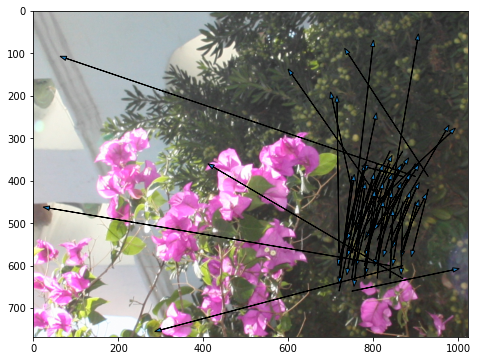

In [29]:
plt.figure(figsize=(16,6))
pm.plot_vect_field(a2, gt2, step=30, head_width=10)

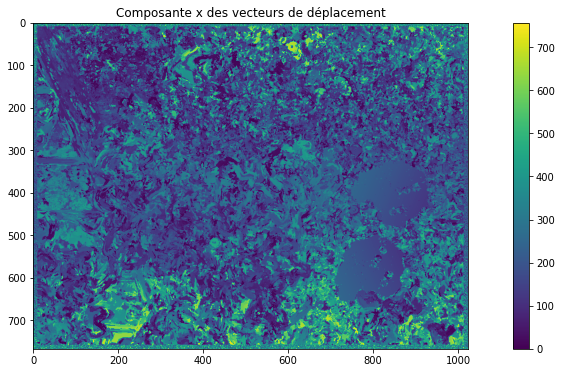

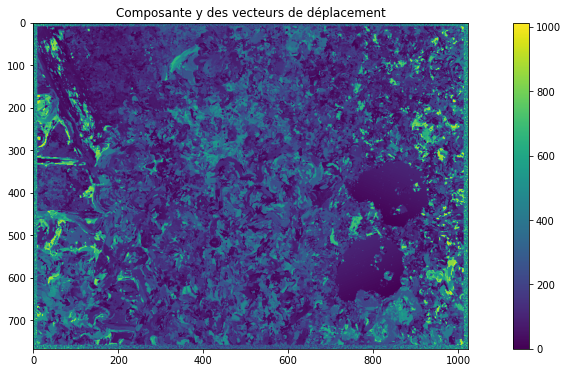

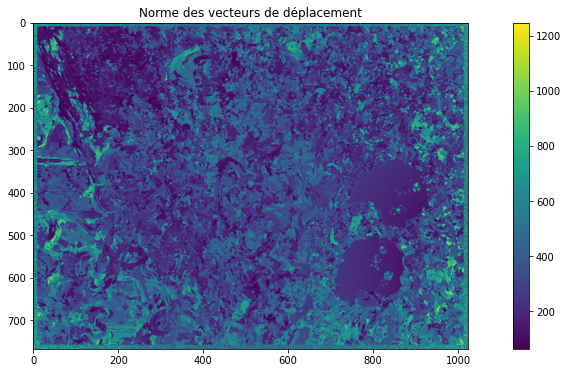

In [30]:
plt.figure(figsize=(16,6))
plt.title('Composante x des vecteurs de déplacement')
plt.imshow(np.abs(a2.vect_field[..., 0])) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Composante y des vecteurs de déplacement')
plt.imshow(np.abs(a2.vect_field[..., 1])) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,6))
plt.title('Norme des vecteurs de déplacement')
plt.imshow(np.sqrt(a2.vect_field[..., 0]**2 + a2.vect_field[..., 1]**2)) #, vmin=0, vmax=60)
plt.colorbar()
plt.show()

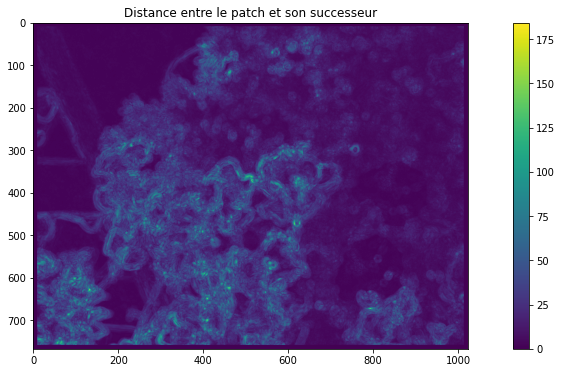

In [31]:
plt.figure(figsize=(16,6))
plt.title('Distance entre le patch et son successeur')
plt.imshow(a2.dist_field)
plt.colorbar()
plt.show()